## Importing Libraries

In [1]:
## install pandas data reader and other libraries
!pip install pandas-datareader

In [2]:
!pip install yfinance

In [3]:
!pip install matplotlib

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


## EDA on Close Price

In [5]:
import yfinance as yf

# Fetch Tesla stock data
tsla_data = yf.download('TSLA')
print(tsla_data.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [6]:
tsla_data.columns = tsla_data.columns.droplevel('Ticker')

In [7]:
tsla_data.tail(15)

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-09,389.790009,404.799988,378.010010,397.609985,96359200
2024-12-10,400.989990,409.730011,390.850006,392.679993,97563600
2024-12-11,424.769989,424.880005,402.380005,409.700012,104287600
2024-12-12,418.100006,429.299988,415.000000,424.839996,87752200
2024-12-13,436.230011,436.299988,415.709991,420.000000,89000200
2024-12-16,463.019989,463.190002,436.149994,441.089996,114083800
2024-12-17,479.859985,483.989990,457.510010,475.899994,131223000
2024-12-18,440.130005,488.540009,427.010010,466.500000,149340800
2024-12-19,436.170013,456.359985,420.019989,451.880005,118566100


In [8]:
type(tsla_data)

pandas.core.frame.DataFrame

In [9]:
print(tsla_data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


<Axes: title={'center': 'Tesla Close Prices'}, xlabel='Date', ylabel='Close Price'>

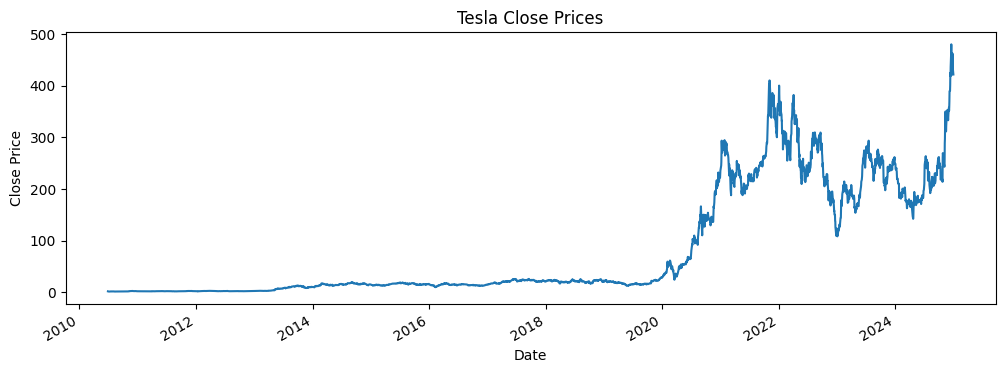

In [10]:
tsla_data['Close'].plot(figsize=(12, 4), title="Tesla Close Prices", ylabel="Close Price")

<Axes: xlabel='Date'>

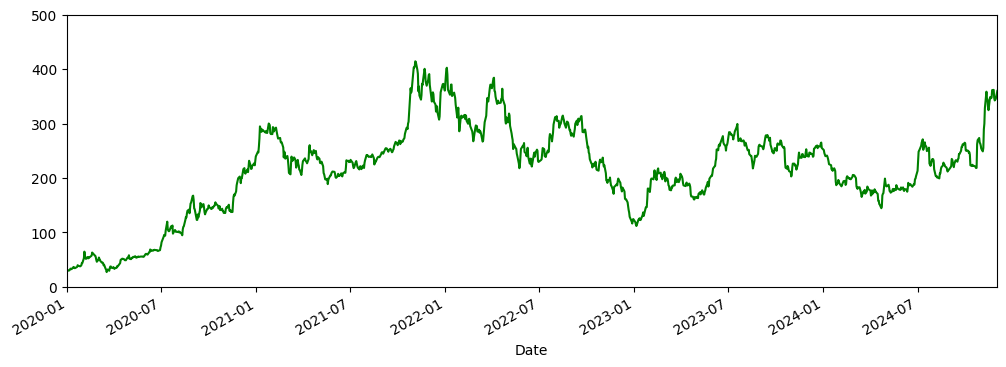

In [11]:
## X and Y limit and coloring
tsla_data['High'].plot(xlim=['2020-01-01','2024-12-01'],ylim=[0,500],figsize=(12,4),c='green')

In [12]:
index=tsla_data.loc['2020-01-01':'2024-09-01'].index
share_close=tsla_data.loc['2020-01-01':'2024-09-01']['Close']

In [13]:
share_close

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2024-08-26    213.210007
2024-08-27    209.210007
2024-08-28    205.750000
2024-08-29    206.279999
2024-08-30    214.110001
Name: Close, Length: 1174, dtype: float64

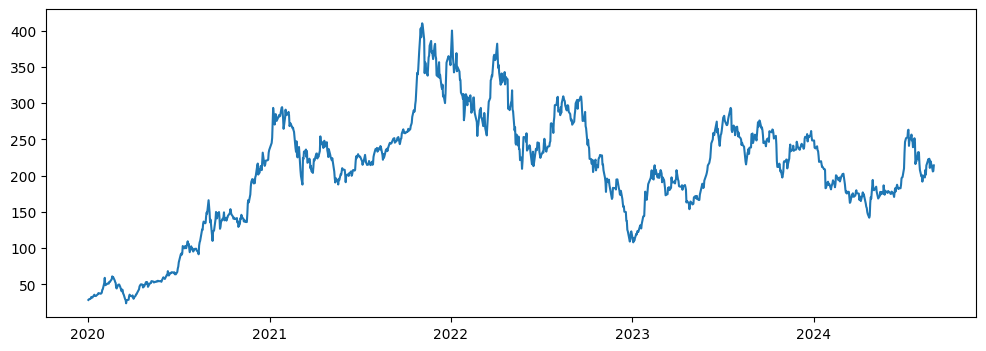

In [14]:
figure,axis=plt.subplots(figsize=(12, 4))
axis.plot(index,share_close)

In [15]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2010-06-29 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3651 non-null   float64
 1   High    3651 non-null   float64
 2   Low     3651 non-null   float64
 3   Open    3651 non-null   float64
 4   Volume  3651 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 300.2 KB


In [16]:
tsla_data=tsla_data.reset_index()

In [17]:
tsla_data=tsla_data.set_index('Date',drop=True)

In [18]:
tsla_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


## Model Training

In [19]:
## importing Libraries
!pip install statsmodels
!pip install scikit-learn

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [20]:
from statsmodels.tsa.stattools import adfuller

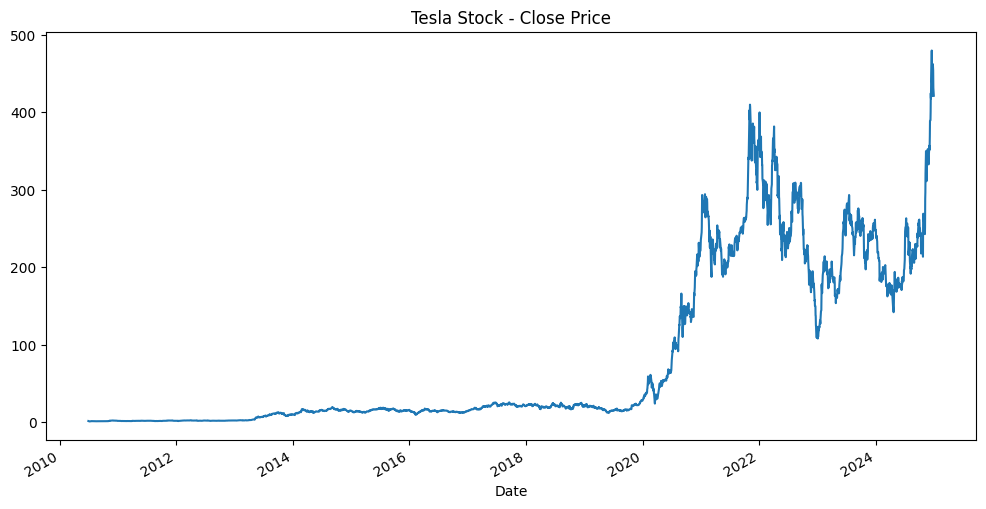

In [21]:
tsla_data['Close'].plot(figsize=(12,6))
plt.title('Tesla Stock - Close Price')
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(tsla_data['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation:
if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")


ADF Statistic: -0.016887181473789134
p-value: 0.957113046754992
The series is non-stationary


In [23]:
tsla_data['Close_diff'] = tsla_data['Close'].diff().dropna()

# Check ADF test again on differenced data
result = adfuller(tsla_data['Close_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("The differenced series is stationary")
else:
    print("The differenced series is still non-stationary")


ADF Statistic: -10.213585189099566
p-value: 5.555972689675972e-18
The differenced series is stationary


In [24]:
# Feature Engineering
tsla_data['Lag1'] = tsla_data['Close'].shift(1)
tsla_data['Lag2'] = tsla_data['Close'].shift(2)
tsla_data['Lag3'] = tsla_data['Close'].shift(3)
tsla_data['MA30'] = tsla_data['Close'].rolling(window=30).mean()

In [25]:
# Drop NA for Feature Columns
tsla_data.dropna(inplace=True)

In [26]:
# Train/Test Split for Machine Learning
X = tsla_data[['Lag1', 'Lag2', 'Lag3', 'MA30']]
y = tsla_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [27]:
# Random Forest Regressor Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Predictions and Evaluation (Random Forest)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}")

Random Forest - RMSE: 15.268824335553425, MAE: 10.840318951731716


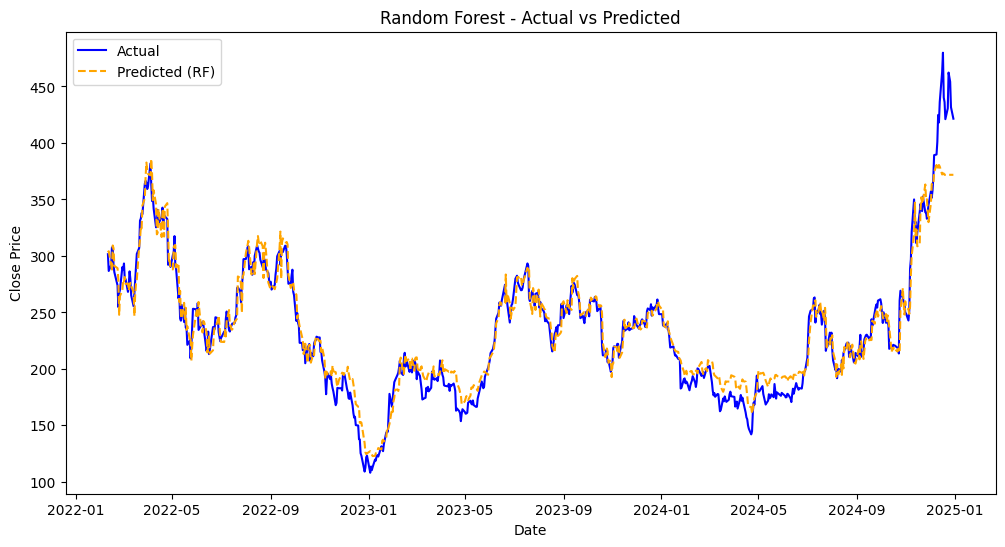

In [29]:
# Visualization of Random Forest Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', color='orange', linestyle='--')
plt.title('Random Forest - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## ARIMA MODEL TRAINING

In [30]:
tsla_data.index = pd.to_datetime(tsla_data.index)

In [31]:
# Set the frequency to business days
tsla_data = tsla_data.asfreq('B')  # 'B' is for business days, adjust as necessary

In [32]:
# Use the stationary differenced series for training
arima_train = tsla_data['Close_diff'].dropna()

In [33]:
import warnings
import itertools
import numpy as np
import pandas as pd# Use the stationary differenced series for training
arima_train = tsla_data['Close_diff'].dropna()
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your time series data
# Replace 'your_time_series' with your actual pandas series
# Example: df['column_name'] if your data is in a dataframe

# Define the p, d, q range for ARIMA parameters
p = range(0, 4)  # Modify this range based on your data
d = range(0, 4)  # Typically 0, 1, or 2
q = range(0, 4)

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Grid search for the best ARIMA model parameters
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        # Fit the ARIMA model with current parameters
        model = ARIMA(arima_train, order=param)
        results = model.fit()
        # Select the model with the lowest AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except Exception as e:
        continue

print(f"Optimal ARIMA parameters: p={best_pdq[0]}, d={best_pdq[1]}, q={best_pdq[2]}")
print(f"Lowest AIC: {best_aic}")


Optimal ARIMA parameters: p=3, d=3, q=2
Lowest AIC: 12.0


In [58]:
# Fit the ARIMA model
arima_model = ARIMA(arima_train, order=(1, 1, 0))  # Adjust (p, d, q) as needed
arima_result = arima_model.fit()

# Summarize the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 3622
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11845.407
Date:                Mon, 30 Dec 2024   AIC                          23694.814
Time:                        22:29:06   BIC                          23707.203
Sample:                             0   HQIC                         23699.228
                               - 3622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5090      0.006    -85.470      0.000      -0.521      -0.497
sigma2        40.6436      0.326    124.637      0.000      40.004      41.283
Ljung-Box (L1) (Q):                 100.13   Jarque-

In [35]:
# Forecast the next value (e.g., one step ahead)
arima_forecast = arima_result.forecast(steps=1)

# Transform back to the original scale
last_close = tsla_data['Close'].iloc[-1]  # Last observed value of Close
next_close_forecast = last_close + arima_forecast.values[0]

print(f"Next Close Price Forecast: {next_close_forecast}")


Next Close Price Forecast: 420.58460932473537


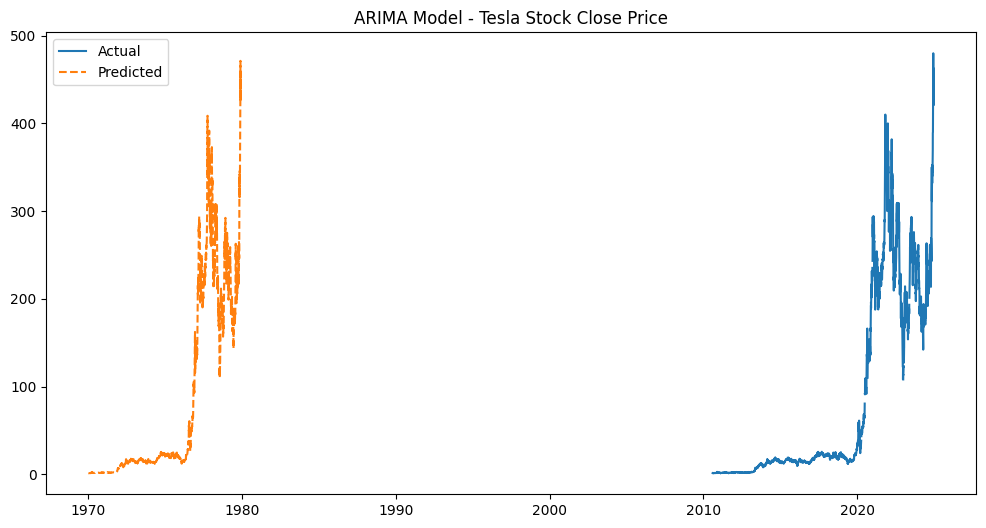

In [59]:
# Generate predictions for the training period
train_pred = arima_result.predict(start=1, end=len(arima_train))
# Adjust index of train_pred to match the tsla_data['Close']
train_pred_index = tsla_data.index[1:len(train_pred) + 1]  # Adjust index to match the training data
train_pred_series = pd.Series(train_pred.cumsum() + tsla_data['Close'].iloc[0], index=train_pred_index)
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Close'], label='Actual')
plt.plot(train_pred.cumsum() + tsla_data['Close'].iloc[0], label='Predicted', linestyle='--')
plt.title('ARIMA Model - Tesla Stock Close Price')
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors
rmse_arima = mean_squared_error(arima_train, train_pred)
mae_arima = mean_absolute_error(arima_train, train_pred)

print(f"Mean Squared Error: {rmse_arima}")
print(f"Mean Absolute Error: {mae_arima}")


Mean Squared Error: 14.208192910485877
Mean Absolute Error: 1.7077176545154658


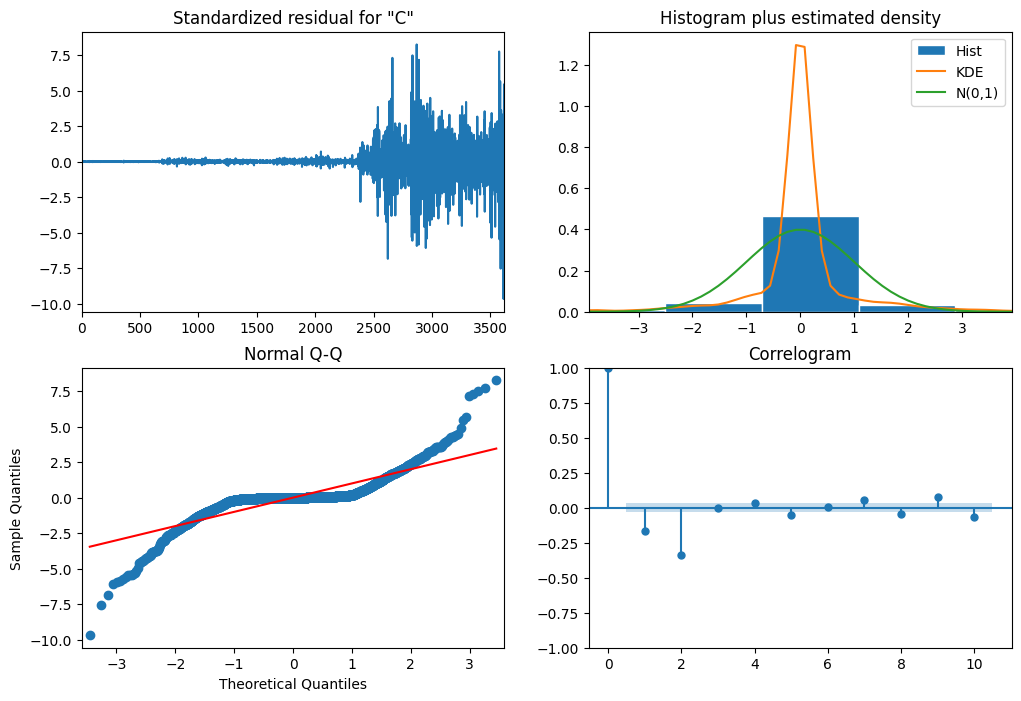

In [61]:
arima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


In [62]:
# Summary of Comparison
print("\nPerformance Comparison:")
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}")
print(f"ARIMA - RMSE: {rmse_arima}, MAE: {mae_arima}")


Performance Comparison:
Random Forest - RMSE: 15.268824335553425, MAE: 10.840318951731716
ARIMA - RMSE: 14.208192910485877, MAE: 1.7077176545154658


In [40]:
import pickle
# Save the trained ARIMA model to a file
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(arima_result, f)

In [42]:
print(f"Forecast type: {type(forecast)}")
print(f"Forecast values: {forecast}")


Forecast type: <class 'pandas.core.series.Series'>
Forecast values: 3622   -0.885392
dtype: float64


In [64]:
# Get AIC and BIC
aic = arima_result.aic
bic = arima_result.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")


AIC: 23694.81431101056
BIC: 23707.20332203009


In [65]:
print(type(arima_forecast))


<class 'pandas.core.series.Series'>
